In [113]:
## Read table, combine table, parse the time string, save to pkl
## Visualize the excursion event
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
from scipy.fftpack import fft, ifft
from scipy import signal
import numpy as np
pd.set_option('display.max_columns', 51)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 32}
plt.rc('font', **font)
%matplotlib inline

In [114]:
file_df = pd.read_pickle("../data/combined.pkl")
print(min(file_df["Time"]), max(file_df["Time"]))

(Timestamp('2016-10-20 00:00:00'), Timestamp('2017-04-01 00:00:00'))


In [115]:
plt.rcParams.update({'font.size': 16})
datefmt = mdates.DateFormatter('%d/%H:%M')
def time_fft(datetime, y):
    '''
    input: array of datetime object
           y signal
    Output: frequency, ABS(signal)
    '''
    N = len(y)
    y_f = np.fft.fft2(y - np.mean(y))
    y_f = y_f[0:int(N/2)] ## Nyquist
    f_max= 1/((datetime[1] - datetime[0]).item()/1e9)/2
    f = np.linspace(0, f_max, len(y_f))
    return f, abs(y_f)
def lp_butter(y, Wn = 0.2):
    n = len(y)
    b, a = signal.butter(4, Wn, 'low')
    output_signal = signal.filtfilt(b, a, y, axis=0)
    return output_signal

def normalize_for_plot(v):
    v_mean=np.mean(v)
    v = v - v_mean
    v_min, v_max = min(v), max(v)
    v = v / max([abs(v_min), abs(v_max)])
    return v
def plot_features(df, start_time, end_time, features, normalized=True, lp_filter = True, legend_on=True):
    '''
    plot the feautres for EDA in different time range
    Feature is suggested to normalize for feature comparison
    '''
    fig, ax = plt.subplots(figsize=(15,8))
    time_range = (df["Time"] < end_time)&(df["Time"] > start_time)
    x = df.loc[time_range,["Time"]].values
    for feature in features:
        y = df.loc[time_range, [feature]].values
        if y[0] is None:
            continue
        if lp_filter:
            y = lp_butter(y, 0.06)
        if normalized:
            y = normalize_for_plot(y)
        ax.plot(x, y, label = feature)
    ax.xaxis.set_major_formatter(datefmt)
    if legend_on:
        plt.legend(features)
def subplot_features(df, start_time, end_time, features1,features2, features3, 
                     normalized=False, lp_filter = True):
    '''
    plot the feautres for EDA in different time range
    Feature is suggested to normalize for feature comparison
    '''
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,figsize=(15,14))
    time_range = (df["Time"] < end_time)&(df["Time"] > start_time)
    x = df.loc[time_range,["Time"]].values
    for feature in features1:
        y = df.loc[time_range, [feature]].values
        if y[0] is None:
            continue
        if lp_filter:
            y = lp_butter(y, 0.06)
        if normalized:
            y = normalize_for_plot(y)
        ax1.plot(x, y, label = feature)
    ax1.xaxis.set_major_formatter(datefmt)
    ax1.legend(features1)
    
    for feature in features2:
        y = df.loc[time_range, [feature]].values
        if y[0] is None:
            continue
        if lp_filter:
            y = lp_butter(y, 0.06)
        if normalized:
            y = normalize_for_plot(y)
        ax2.plot(x, y, label = feature)
    ax2.xaxis.set_major_formatter(datefmt)
    ax2.legend(features2)
    
    for feature in features3:
        y = df.loc[time_range, [feature]].values
        if y[0] is None:
            continue
        if lp_filter:
            y = lp_butter(y, 0.06)
        if normalized:
            y = normalize_for_plot(y)
        ax3.plot(x, y, label = feature)
    ax3.xaxis.set_major_formatter(datefmt)
    ax3.legend(features3)

    
upset_events = [20161026, 20161111, 20161116, 20161127, 20170128, 20170219, 20170312]
def parse_npdate(array):
    '''
    Input: array of datetime
    Output: array year
            array month
            array day
            array hour
            array min
    '''
    n = len(array)
    year = np.arange(n)
    month = np.arange(n)
    day = np.arange(n)
    hour = np.arange(n)
    mini = np.arange(n)
    for i in range(n):
        (tem1, tem2) = str(array[i][0]).split("T")
        tem1_s = tem1.split("-")
        tem2_s = tem2.split(":")
        year[i] = tem1_s[0]
        month[i] = tem1_s[1]
        day[i] = tem1_s[2]
        hour[i] = tem2_s[0]
        mini[i] = tem2_s[1]
    return year, month, day, hour, mini
def check_subset(List1, List2):
    '''
    If List1 contains List 2
    '''
    set1 = set(List1)
    set2 = set(List2)
    return set1 >= set2

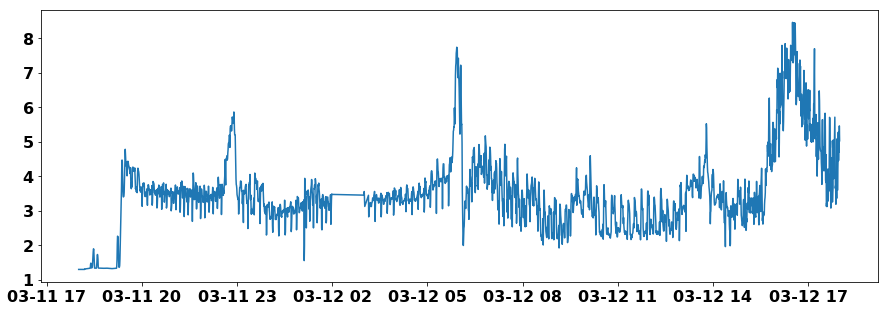

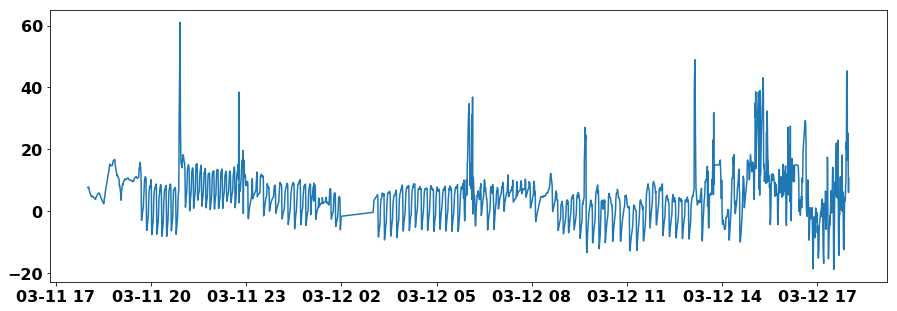

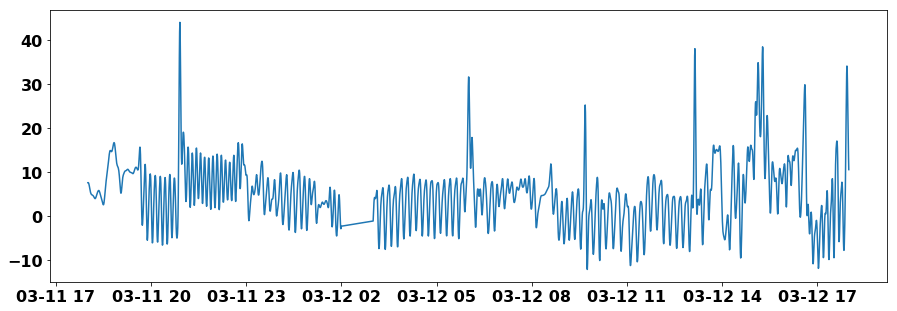

In [122]:
## March 12, 2017
separator_2nd_features_1 = [
                           "21-LT-10618.PV_Prod_Sep_2nd_Stg_Interface (%)",
                           "21-LT-10620.PV_Prod_Sep_2nd_Stg_Interface (%)",
                         ]

separator_2nd_features_2 = [
                            "30-FT-19107-01.PV_2nd_Stg_Hydrocyclone_Inlet (BPD)"
                         ]
separator_2nd_features_3 = [
                            "21-LY-10620.OUT_2nd_Stg_Hydrocyclone_Wtr_Out (%)",
                            "30-PDY-19104.OUT_2nd_Stg_Prod_Hydrocyclone_Out (%)"
                         ]

## March 12, 2017
start_time = datetime(2017, 3, 11,18,0)
end_time = datetime(2017, 3, 12, 18,0)
df = file_df
time_range = (df["Time"] < end_time)&(df["Time"] > start_time)
x = df.loc[time_range,["Time"]].values
y = (df["21-LT-10620.PV_Prod_Sep_2nd_Stg_Interface (%)"] - df["21-LT-10618.PV_Prod_Sep_2nd_Stg_Interface (%)"]).values
y = y[time_range]
plt.figure(figsize=(15,5))
plt.plot(x, y, label="Level difference")
plt.show()
# y_df = np.diff(y)
# x_df = x[0:len(y) - 1]
# plt.figure(figsize=(15,5))
# plt.plot(x_df, y_df, label="Level diff change")
# plt.show()


y2 = (df["30-PDY-19104.OUT_2nd_Stg_Prod_Hydrocyclone_Out (%)"] - 
      df["21-LY-10620.OUT_2nd_Stg_Hydrocyclone_Wtr_Out (%)"]).values
y2 = y2[time_range]
y2_lp = lp_butter(y2)
plt.figure(figsize=(15,5))
plt.plot(x, y2, label="Oil-water output % difference")
plt.show()
# plt.figure(figsize=(15,5))
# plt.plot(x, y2_lp, label="Oil-water output % difference")
# plt.show()

In [117]:
index = abs(y) > 15
x_ab = x[index]
year, month, day, hour, mini = parse_npdate(x_ab)
np.unique(year * 10000 + month * 100 + day)
print("If this include all upsets ", check_subset(test, upset_events))
print("What left out", set(upset_events) - set(test))
print(set(test))

('If this include all upsets ', False)
('What left out', set([20161026, 20161127, 20170312, 20170128, 20161111, 20161116]))
set([20161121, 20170118, 20170122, 20170123, 20170129, 20161106, 20161226, 20170303])


In [97]:
index = abs(y) > 5
x_ab = x[index]
year, month, day, hour, mini = parse_npdate(x_ab)
test = np.unique(year * 10000 + month * 100 + day)
print("If this include all upsets ", check_subset(test, upset_events))
print("What left out", set(upset_events) - set(test))

('If this include all upsets ', False)
('What left out', set([20161026, 20161116, 20161111]))


In [109]:
index = abs(y_df) > 3
x_ab = x_df[index]
year, month, day, hour, mini = parse_npdate(x_ab)
test = np.unique(year * 10000 + month * 100 + day)
print("If this include all upsets ", check_subset(test, upset_events))
print("What left out", set(upset_events) - set(test))
print(set(test))

('If this include all upsets ', False)
('What left out', set([20161026, 20161127, 20170312, 20170128, 20161111, 20161116]))
set([20161121, 20170118, 20170122, 20170123, 20170129, 20161106, 20161226, 20170303])
